# 課題3: 閾値処理
閾値を4パターン設定し、閾値処理した画像を示せ。

閾値処理とは、各画素の濃度が閾値より明るいか、暗いかによって、その画素を白か黒かへ変換し、2値画像化する処理である。

この処理を式で表すと、入力画像を $f(i,j)$ 、閾値を $t$ としたとき、出力画像 $g_t(i,j)$ は

$$
g_t(i,j) = \begin{cases}
    1 & f(i,j) \ge t \\
    0 & f(i,j) \lt t
\end{cases}
$$

となる。

閾値を64、96、128、192として閾値処理を行ってみる。原画像は課題2で使用した原画像を使用する。原画像を図1に示す。

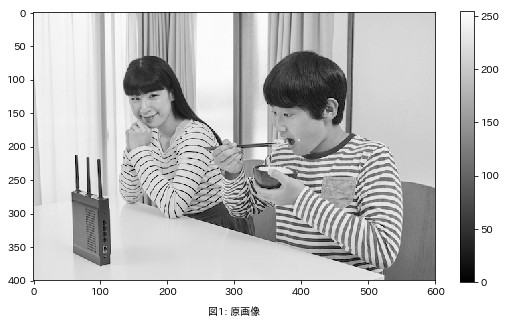

In [1]:
# 環境準備
%run -i prelude.ipynb

# 画像を読み込む
original = PIL.Image.open(IMAGE1_PATH)

# グレースケールに変換
original = np.array(original.convert(mode='L'))

# 表示
def imshow(img, vmax, title):
    fig, ax = plt.subplots(figsize=(9, 5))
    m = ax.imshow(img, cmap='gray', vmin=0, vmax=vmax)
    fig.colorbar(m)
    ax.text(0.5, -0.1, title,
            transform=ax.transAxes,
            horizontalalignment='center',
            verticalalignment='top')

imshow(original, 255, '図1: 原画像')

原画像に対して、閾値以上の画素を1、閾値未満の画素を0に変換する。これは、各画素に対して、「閾値以上か」という条件を満たしているかを表す行列を、そのまま出力画像として利用できる。この方法を用いて生成した画像を、図2（閾値64）、図3（閾値96）、図4（閾値128）、図5（閾値192）に示す。

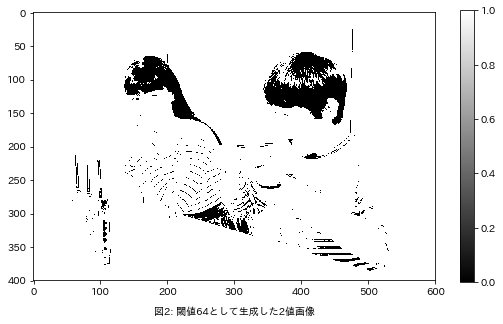

In [2]:
img64 = original >= 64
imshow(img64, 1, '図2: 閾値64として生成した2値画像')

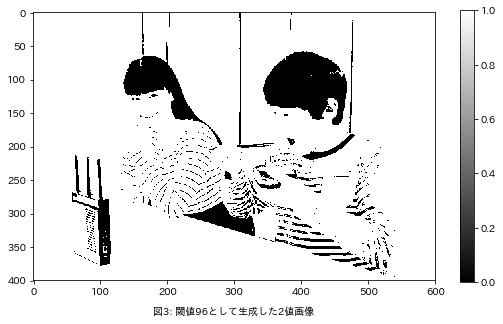

In [3]:
img96 = original >= 96
imshow(img96, 1, '図3: 閾値96として生成した2値画像')

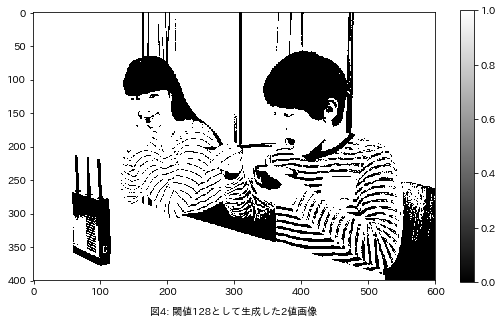

In [4]:
img128 = original >= 128
imshow(img128, 1, '図4: 閾値128として生成した2値画像')

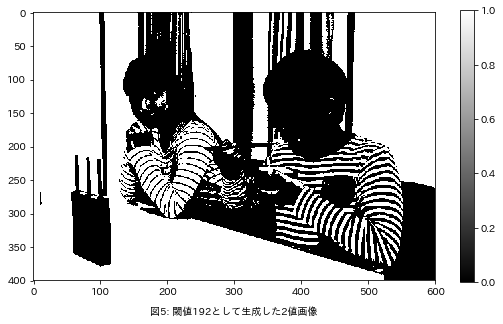

In [5]:
img192 = original >= 192
imshow(img192, 1, '図5: 閾値192として生成した2値画像')

結果より、使用した原画像の2値化では、閾値64（図2）のとき、ほとんどが白くなってしまい、何が写っているのかわからなくなってしまった。閾値96（図3）、128（図4）だと、人の目では、何が写っているのかは判断できるが、顔の輪郭が現れていないので、コンピュータで顔を認識する用途には使用できなさそうだ。閾値192（図5）のときは、比較的に被写体が黒、背景が白にきれいに分かれたように見える。ただ、カーテンのシワが黒になっていて、2値化結果をみて、これが何かを判断するのは難しそうに思える。